In [1]:
import rioxarray
import xarray as xs
import matplotlib.pyplot as plt
import os
import glob
import datetime
from netCDF4 import Dataset, num2date, date2num
import numpy as np
%matplotlib inline
import pandas as pd
from calendar import isleap
from pandas.tseries.offsets import DateOffset
from pathlib import Path 
import seaborn as sns

In [2]:
region = "North"
grph_name = "Northern"

In [3]:
folder = "C:/Mayank/Projects/Project_Vietnam/NewData/GCM_Download/ECEARTH3/Merged/Clipped/Unit_Changed/Regional"
folder2 = "C:/Mayank/Projects/Project_Vietnam/NewData/GCM_Download/ECEARTH_Veg/Merged/Clipped/Unit_Changed/Regional"
# folder3 = "C:/Mayank/Projects/Project_Vietnam/NewData/GCM_Download/ECEARTH3/Merged/Clipped/Unit_Changed/Regional/Graphs"

In [4]:
ec3_hist = xs.open_dataset(os.path.join(folder, "historical_tas_ecearth3_final_"+region+".nc"))
ec3_ssp245 = xs.open_dataset(os.path.join(folder, "ssp245_tas_ecearth3_final_"+region+".nc"))
ec3_ssp585 = xs.open_dataset(os.path.join(folder, "ssp585_tas_ecearth3_final_"+region+".nc"))
ecveg_hist = xs.open_dataset(os.path.join(folder2, "historical_tas_ecearth_veg_final_"+region+".nc"))
ecveg_ssp245 = xs.open_dataset(os.path.join(folder2, "ssp245_tas_ecearth_veg_final_"+region+".nc"))
ecveg_ssp585 = xs.open_dataset(os.path.join(folder2, "ssp585_tas_ecearth_veg_final_"+region+".nc"))

C:\ProgramData\anaconda3\lib\site-packages\xarray\backends\plugins.py:71: RuntimeWarning: Engine 'gini' loading failed:
cannot import name 'deprecated' from 'typing_extensions' (C:\ProgramData\anaconda3\lib\site-packages\typing_extensions.py)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [5]:
esm_hist = (ec3_hist['tas']+ecveg_hist['tas'])/2
esm_ssp245 = (ec3_ssp245['tas']+ecveg_ssp245['tas'])/2
esm_ssp585 = (ec3_ssp585['tas']+ecveg_ssp585['tas'])/2

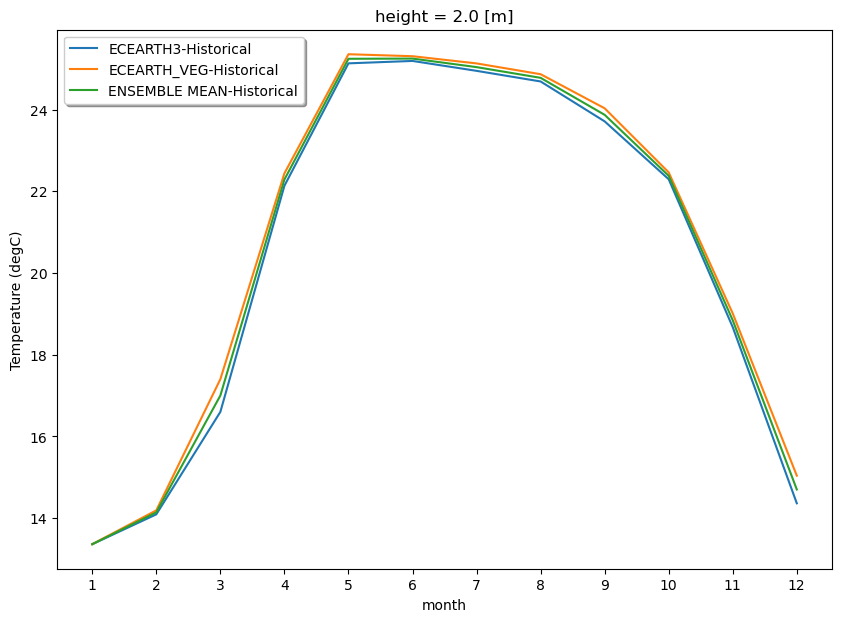

In [8]:
fig,ax = plt.subplots(figsize=(10,7))
ec3_hist.tas.groupby('time.month').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH3-Historical')
ecveg_hist.tas.groupby('time.month').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH_VEG-Historical')
esm_hist.groupby('time.month').mean(['time','lon','lat']).plot(ax=ax,label='ENSEMBLE MEAN-Historical')
# ax.legend(loc='upper left', 
#           fancybox=True, shadow=True)
# trend = np.polyfit(np.arange(1,13), esm_hist.groupby('time.month').mean(['time','lon','lat']), 1)
# print(trend)
# theta1=trend[1]
# theta0=trend[0]
# # X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# # print(X)
# # ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# # trend = esm_hist.polyfit('time',1)
# # print(trend)
# y= np.arange(1,13)*theta0 + theta1

# print(y)
# # print(trend)
# ax.plot(np.arange(1, 13, step=1), y, linestyle='dashed', label='ENSEMBLE trend')
ax.legend(loc='upper left', 
          fancybox=True, shadow=True)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Temperature (degC)')
plt.show()
# plt.savefig(os.path.join(folder3, 'fig1.png'))

[ 0.05867613 19.96116022]
[20.01983635 20.07851248 20.13718861 20.19586473 20.25454086 20.31321699
 20.37189312 20.43056924 20.48924537 20.5479215  20.60659763 20.66527376
 20.72394988 20.78262601 20.84130214 20.89997827 20.95865439 21.01733052
 21.07600665 21.13468278 21.1933589 ]


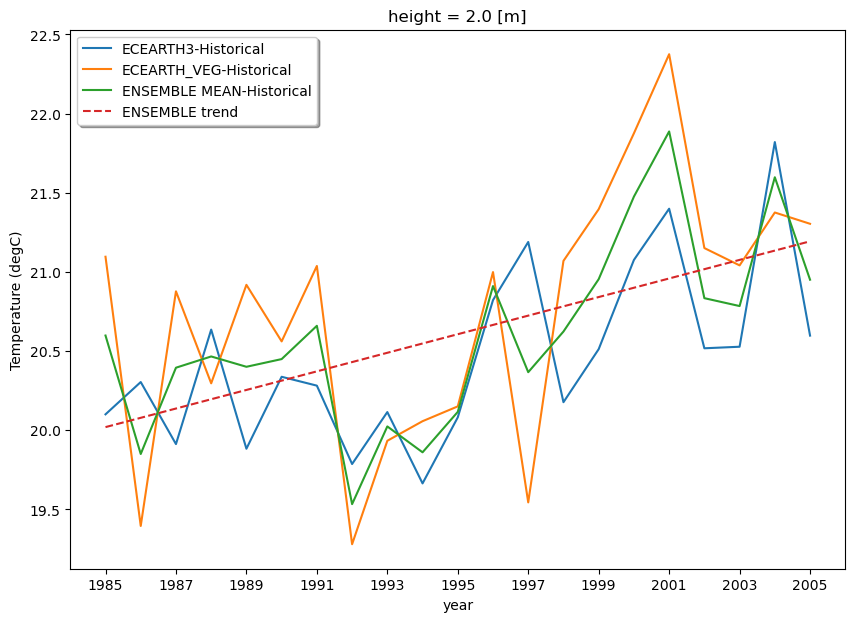

In [6]:
fig,ax = plt.subplots(figsize=(10,7))
ec3_hist.tas.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH3-Historical')
ecveg_hist.tas.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH_VEG-Historical')
esm_hist.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ENSEMBLE MEAN-Historical')
# ax.legend(loc='upper left', 
#           fancybox=True, shadow=True)
trend = np.polyfit(np.arange(1,22), esm_hist.groupby('time.year').mean(['time','lon','lat']), 1)
print(trend)
theta1=trend[1]
theta0=trend[0]
# X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# print(X)
# ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# trend = esm_hist.polyfit('time',1)
# print(trend)
y= np.arange(1,22)*theta0 + theta1

print(y)
# print(trend)
ax.plot(np.arange(1985, 2006, step=1), y, linestyle='dashed', label='ENSEMBLE trend')
ax.legend(loc='upper left', 
          fancybox=True, shadow=True)
plt.xticks(np.arange(1985, 2006, step=2))
plt.ylabel('Temperature (degC)')
plt.show()
# plt.savefig(os.path.join(folder3, 'fig1.png'))

[ 0.05305958 21.13406998]
[21.18712956 21.24018914 21.29324873 21.34630831 21.39936789 21.45242748
 21.50548706 21.55854664 21.61160622 21.66466581 21.71772539 21.77078497
 21.82384456 21.87690414 21.92996372 21.9830233  22.03608289 22.08914247
 22.14220205 22.19526164 22.24832122]


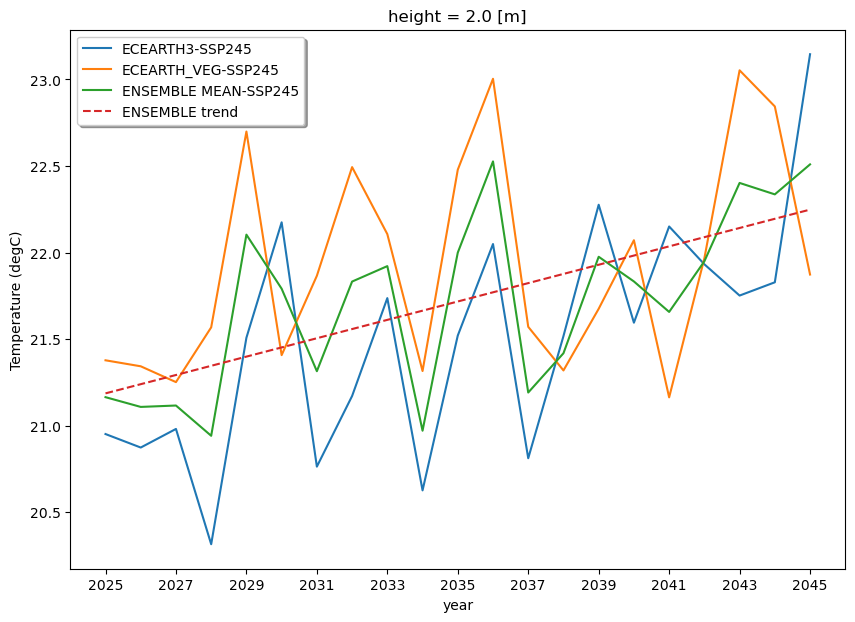

In [7]:
fig,ax = plt.subplots(figsize=(10,7))
ec3_ssp245.tas.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH3-SSP245')
ecveg_ssp245.tas.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH_VEG-SSP245')
esm_ssp245.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ENSEMBLE MEAN-SSP245')
trend = np.polyfit(np.arange(1,22), esm_ssp245.groupby('time.year').mean(['time','lon','lat']), 1)
print(trend)
theta1=trend[1]
theta0=trend[0]
# X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# print(X)
# ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# trend = esm_hist.polyfit('time',1)
# print(trend)
y= np.arange(1,22)*theta0 + theta1

print(y)
# print(trend)
ax.plot(np.arange(2025, 2046, step=1), y, linestyle='dashed', label='ENSEMBLE trend')
ax.legend(loc='upper left',
          fancybox=True, shadow=True)
plt.xticks(np.arange(2025, 2046, step=2))
plt.ylabel('Temperature (degC)')
plt.show()
# plt.savefig(os.path.join(folder3, 'fig2.png'))

[ 0.04042422 21.47762658]
[21.5180508  21.55847502 21.59889924 21.63932346 21.67974767 21.72017189
 21.76059611 21.80102033 21.84144455 21.88186876 21.92229298 21.9627172
 22.00314142 22.04356564 22.08398985 22.12441407 22.16483829 22.20526251
 22.24568673 22.28611094 22.32653516]


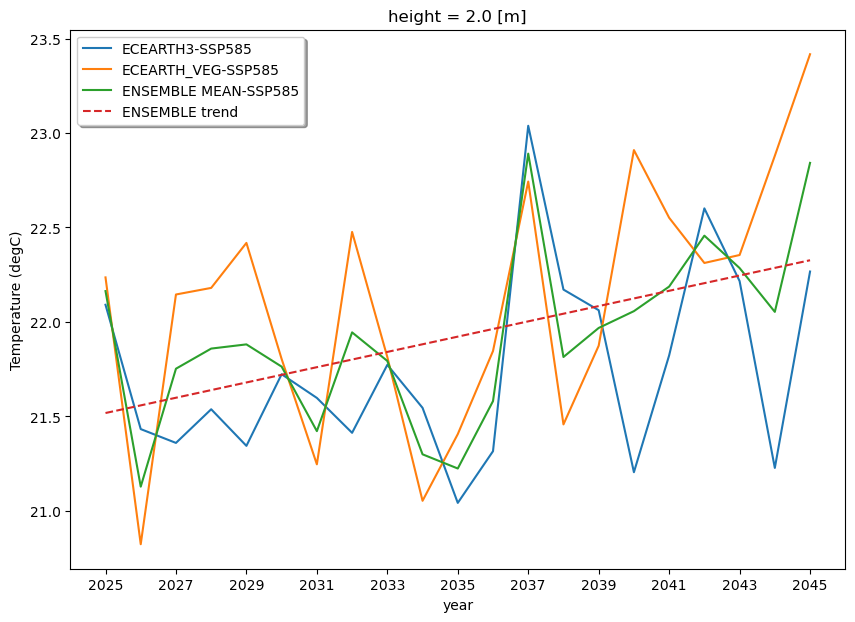

In [8]:
fig,ax = plt.subplots(figsize=(10,7))
ec3_ssp585.tas.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH3-SSP585')
ecveg_ssp585.tas.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH_VEG-SSP585')
esm_ssp585.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ENSEMBLE MEAN-SSP585')
trend = np.polyfit(np.arange(1,22), esm_ssp585.groupby('time.year').mean(['time','lon','lat']), 1)
print(trend)
theta1=trend[1]
theta0=trend[0]
# X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# print(X)
# ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# trend = esm_hist.polyfit('time',1)
# print(trend)
y= np.arange(1,22)*theta0 + theta1

print(y)
# print(trend)
ax.plot(np.arange(2025, 2046, step=1), y, linestyle='dashed', label='ENSEMBLE trend')
ax.legend(loc='upper left',
          fancybox=True, shadow=True)
plt.xticks(np.arange(2025, 2046, step=2))
plt.ylabel('Temperature (degC)')
plt.show()
# plt.savefig(os.path.join(folder3, 'fig3.png'))

In [9]:
Arc_yearly = esm_ssp245.groupby('time.year').mean(['time','lon','lat'])

In [10]:
Arc_yearly

<xarray.DataArray 'tas' (year: 21)>
array([21.165184, 21.1089  , 21.11696 , 20.942192, 22.103743, 21.791475,
       21.315151, 21.832813, 21.921993, 20.97151 , 21.99981 , 22.52669 ,
       21.192015, 21.41883 , 21.976007, 21.833427, 21.657478, 21.949831,
       22.402359, 22.33635 , 22.509514], dtype=float32)
Coordinates:
    height   float64 2.0
  * year     (year) int64 2025 2026 2027 2028 2029 ... 2041 2042 2043 2044 2045

In [11]:
Arc_clim = esm_hist.mean()

In [12]:
Arc_clim

<xarray.DataArray 'tas' ()>
array(20.606598, dtype=float32)
Coordinates:
    height   float64 2.0

In [13]:
Arc_anom = Arc_yearly - Arc_clim

In [14]:
df = Arc_anom.to_dataframe()
df['positive'] = df['tas'] > 0
df.head() # show only first five rows

,height,tas,positive
year,,,
2025,2.0,0.558586,True
2026,2.0,0.502302,True
2027,2.0,0.510363,True
2028,2.0,0.335594,True
2029,2.0,1.497145,True


[0.05305958 0.52747208]
[0.58053166 0.63359124 0.68665083 0.73971041 0.79276999 0.84582958
 0.89888916 0.95194874 1.00500832 1.05806791 1.11112749 1.16418707
 1.21724666 1.27030624 1.32336582 1.3764254  1.42948499 1.48254457
 1.53560415 1.58866374 1.64172332]


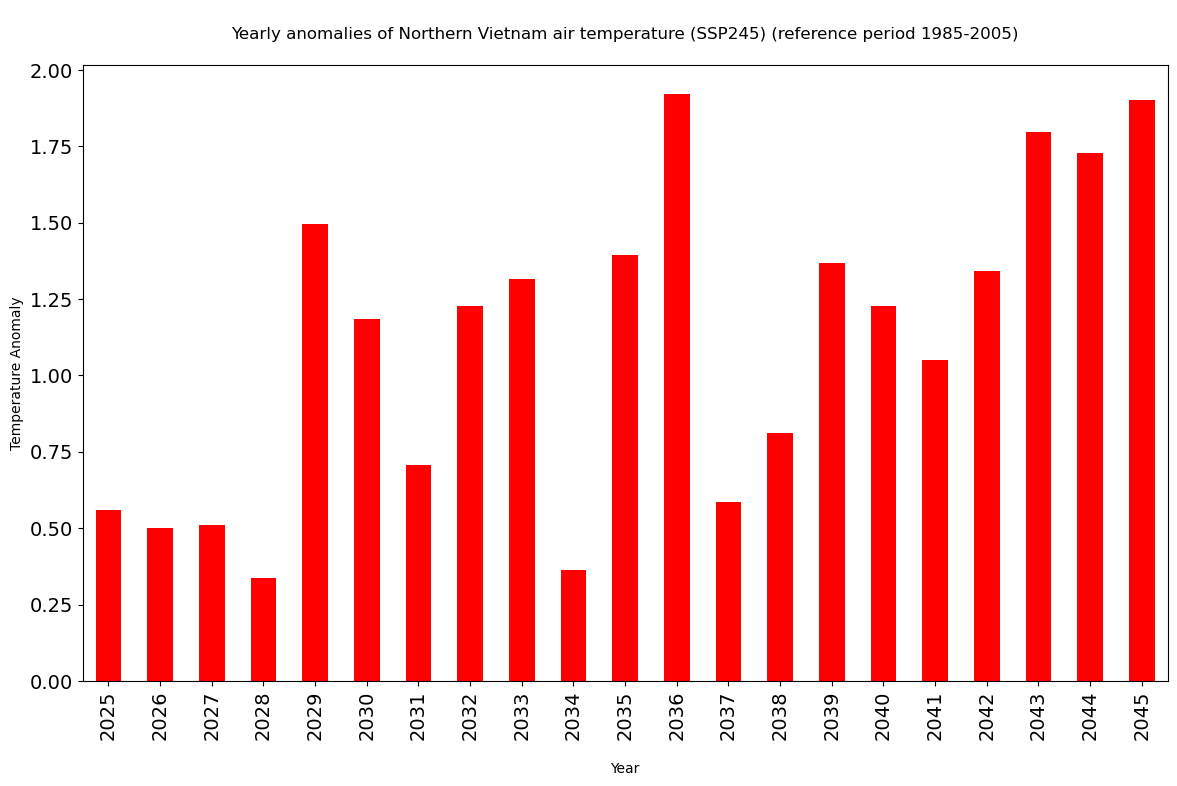

In [15]:
# fig,ax = plt.subplots(figsize=(14,8))
# plt.rcParams.update({'font.size': 18}) # must set in top
# fig, ax1 = plt.subplots(figsize=(14,8))
# # plt.figure()
# plt.rcParams.update({'font.size': 18}) # must set in top
df['tas'].plot(
    figsize=(14,8),
    kind='bar',
    color=df.positive.map({True: 'red', False: 'blue'}),
    fontsize=14,
    xlabel='\nYear',
    ylabel='Temperature Anomaly',
    title='\nYearly anomalies of '+grph_name+' Vietnam air temperature (SSP245) (reference period 1985-2005)\n',
    )
trend = np.polyfit(np.arange(1,22), df.tas, 1)
print(trend)
theta1=trend[1]
theta0=trend[0]
# # X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# # print(X)
# # ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# # trend = esm_hist.polyfit('time',1)
# # print(trend)
y= np.arange(1,22)*theta0 + theta1
print(y)
# axes2 = ax1.twinx()
# axes2.set_ylim(0, 2)
# axes2.plot(np.arange(2025, 2046, step=1), y, linestyle='dashed', color='k', label='ENSEMBLE trend')
# ax.legend(loc='upper left', 
#           fancybox=True, shadow=True)
# plt.show()
# plt.savefig(os.path.join(folder3, 'fig4.png'))

In [16]:
Arc_yearly2 = esm_ssp585.groupby('time.year').mean(['time','lon','lat'])

In [17]:
Arc_yearly2

<xarray.DataArray 'tas' (year: 21)>
array([22.16335 , 21.128319, 21.752546, 21.859028, 21.881273, 21.763496,
       21.422205, 21.944807, 21.793589, 21.299473, 21.224363, 21.581066,
       22.890648, 21.814505, 21.968208, 22.057138, 22.187164, 22.45659 ,
       22.285236, 22.053299, 22.841848], dtype=float32)
Coordinates:
    height   float64 2.0
  * year     (year) int64 2025 2026 2027 2028 2029 ... 2041 2042 2043 2044 2045

In [18]:
Arc_clim2 = esm_hist.mean()

In [19]:
Arc_clim2

<xarray.DataArray 'tas' ()>
array(20.606598, dtype=float32)
Coordinates:
    height   float64 2.0

In [20]:
Arc_anom2 = Arc_yearly2 - Arc_clim2

In [21]:
df2 = Arc_anom2.to_dataframe()
df2['positive'] = df2['tas'] > 0
# print(df2)
df2.head() # show only first five rows

,height,tas,positive
year,,,
2025,2.0,1.556751,True
2026,2.0,0.521721,True
2027,2.0,1.145948,True
2028,2.0,1.252430,True
2029,2.0,1.274675,True


[0.05305958 0.52747208]
[0.58053166 0.63359124 0.68665083 0.73971041 0.79276999 0.84582958
 0.89888916 0.95194874 1.00500832 1.05806791 1.11112749 1.16418707
 1.21724666 1.27030624 1.32336582 1.3764254  1.42948499 1.48254457
 1.53560415 1.58866374 1.64172332]


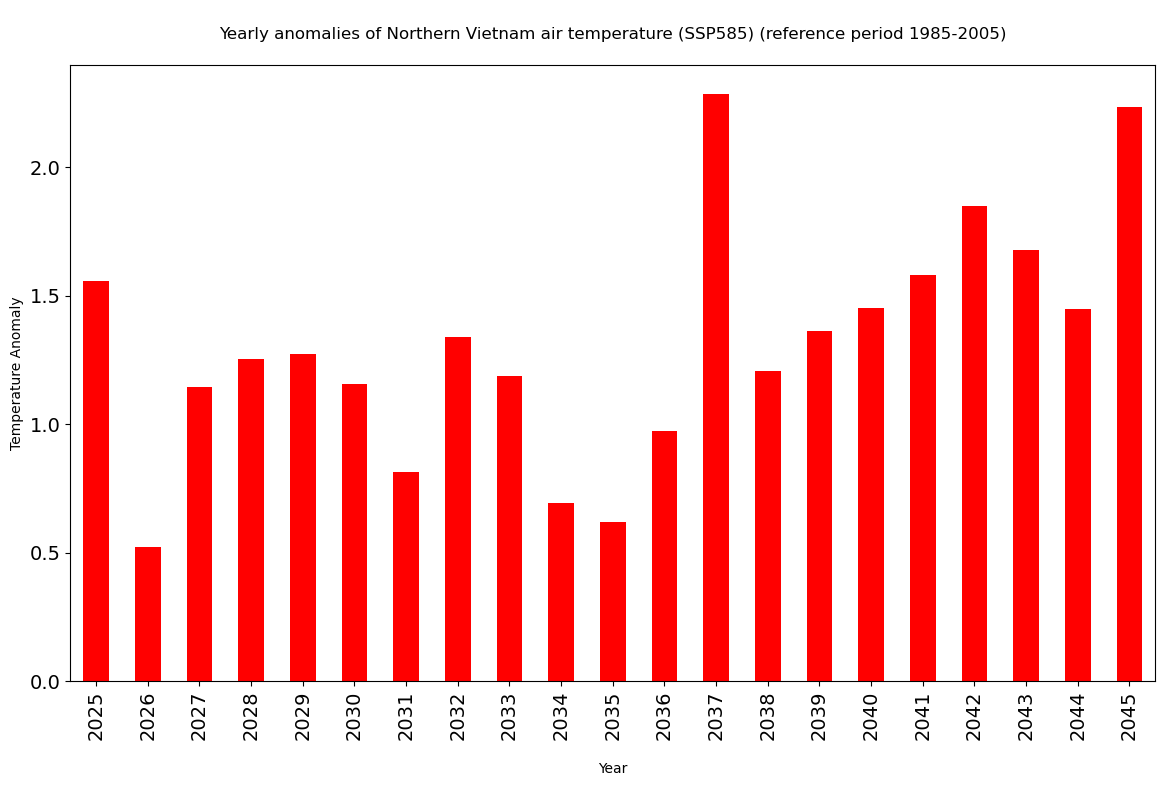

In [22]:
# plt.rcParams.update({'font.size': 18}) # must set in top
# fig,ax = plt.subplots(figsize=(14,8))
df2['tas'].plot(
    figsize=(14,8),
    kind='bar',
    color=df2.positive.map({True: 'red', False: 'blue'}),
    fontsize=14,
    xlabel='\nYear',
    ylabel='Temperature Anomaly',
    title='\nYearly anomalies of '+grph_name+' Vietnam air temperature (SSP585) (reference period 1985-2005)\n',
    )
trend2 = np.polyfit(np.arange(1,22), df.tas, 1)
print(trend2)
theta12=trend2[1]
theta02=trend2[0]
# # X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# # print(X)
# # ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# # trend = esm_hist.polyfit('time',1)
# # print(trend)
y2= np.arange(1,22)*theta02 + theta12
print(y2)
# plt.show()
# plt.savefig(os.path.join(folder3, 'fig5.png'))

Precipitation

In [9]:
ec3_hist_pr = xs.open_dataset(os.path.join(folder, "historical_pr_ecearth3_final_"+region+".nc"))
ec3_ssp245_pr = xs.open_dataset(os.path.join(folder, "ssp245_pr_ecearth3_final_"+region+".nc"))
ec3_ssp585_pr = xs.open_dataset(os.path.join(folder, "ssp585_pr_ecearth3_final_"+region+".nc"))
ecveg_hist_pr = xs.open_dataset(os.path.join(folder2, "historical_pr_ecearth_veg_final_"+region+".nc"))
ecveg_ssp245_pr = xs.open_dataset(os.path.join(folder2, "ssp245_pr_ecearth_veg_final_"+region+".nc"))
ecveg_ssp585_pr = xs.open_dataset(os.path.join(folder2, "ssp585_pr_ecearth_veg_final_"+region+".nc"))

In [10]:
esm_hist_pr = (ec3_hist_pr['pr']+ecveg_hist_pr['pr'])/2
esm_ssp245_pr = (ec3_ssp245_pr['pr']+ecveg_ssp245_pr['pr'])/2
esm_ssp585_pr = (ec3_ssp585_pr['pr']+ecveg_ssp585_pr['pr'])/2

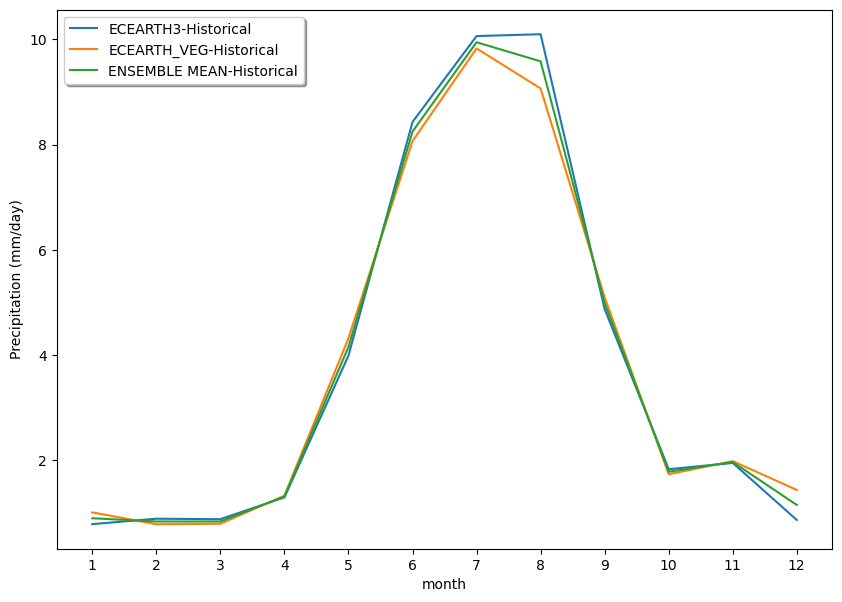

In [11]:
fig,ax = plt.subplots(figsize=(10,7))
ec3_hist_pr.pr.groupby('time.month').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH3-Historical')
ecveg_hist_pr.pr.groupby('time.month').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH_VEG-Historical')
esm_hist_pr.groupby('time.month').mean(['time','lon','lat']).plot(ax=ax,label='ENSEMBLE MEAN-Historical')
# ax.legend(loc='upper left', 
#           fancybox=True, shadow=True)
# trend = np.polyfit(np.arange(1,13), esm_hist.groupby('time.month').mean(['time','lon','lat']), 1)
# print(trend)
# theta1=trend[1]
# theta0=trend[0]
# # X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# # print(X)
# # ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# # trend = esm_hist.polyfit('time',1)
# # print(trend)
# y= np.arange(1,13)*theta0 + theta1

# print(y)
# # print(trend)
# ax.plot(np.arange(1, 13, step=1), y, linestyle='dashed', label='ENSEMBLE trend')
ax.legend(loc='upper left', 
          fancybox=True, shadow=True)
plt.xticks(np.arange(1, 13, step=1))
plt.ylabel('Precipitation (mm/day)')
plt.show()

[-0.03171547  4.17626609]
[4.14455062 4.11283515 4.08111968 4.04940421 4.01768874 3.98597327
 3.9542578  3.92254233 3.89082687 3.8591114  3.82739593 3.79568046
 3.76396499 3.73224952 3.70053405 3.66881858 3.63710311 3.60538764
 3.57367218 3.54195671 3.51024124]


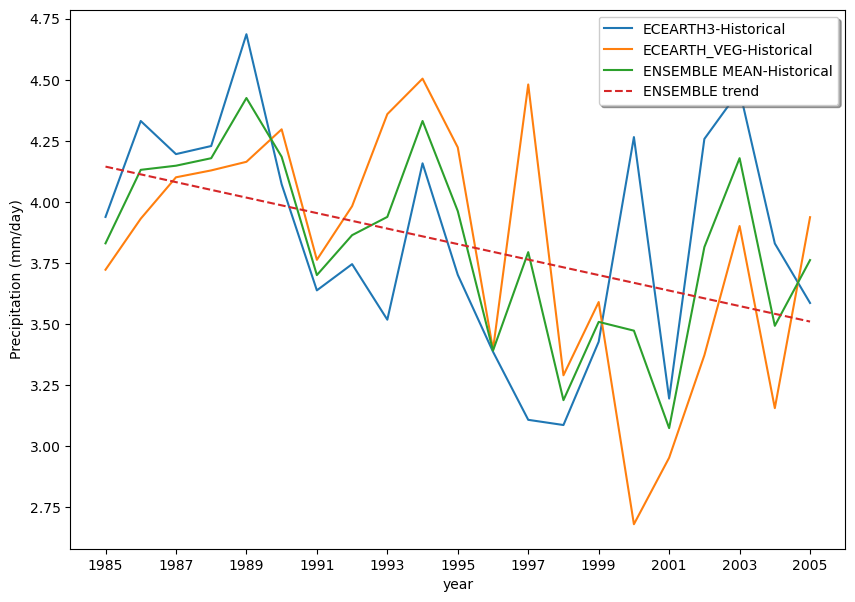

In [25]:
# plt.rcParams.update({'font.size': 12}) 
fig,ax = plt.subplots(figsize=(10,7))
# must set in top
ec3_hist_pr.pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH3-Historical')
ecveg_hist_pr.pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH_VEG-Historical')
esm_hist_pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ENSEMBLE MEAN-Historical')
# ax.legend(loc='upper left', 
#           fancybox=True, shadow=True)
trend_pr = np.polyfit(np.arange(1,22), esm_hist_pr.groupby('time.year').mean(['time','lon','lat']), 1)
print(trend_pr)
theta1_pr=trend_pr[1]
theta0_pr=trend_pr[0]
# X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# print(X)
# ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# trend = esm_hist.polyfit('time',1)
# print(trend)
y_pr= np.arange(1,22)*theta0_pr + theta1_pr

print(y_pr)
# print(trend)
ax.plot(np.arange(1985, 2006, step=1), y_pr, linestyle='dashed', label='ENSEMBLE trend')
ax.legend(loc='upper right', 
          fancybox=True, shadow=True)
plt.xticks(np.arange(1985, 2006, step=2))
plt.ylabel('Precipitation (mm/day)')
plt.show()
# plt.savefig(os.path.join(imddir, 'Historic_temp.png'))

[0.0136889  3.65457822]
[3.66826712 3.68195601 3.69564491 3.7093338  3.7230227  3.7367116
 3.75040049 3.76408939 3.77777828 3.79146718 3.80515607 3.81884497
 3.83253386 3.84622276 3.85991165 3.87360055 3.88728944 3.90097834
 3.91466723 3.92835613 3.94204502]


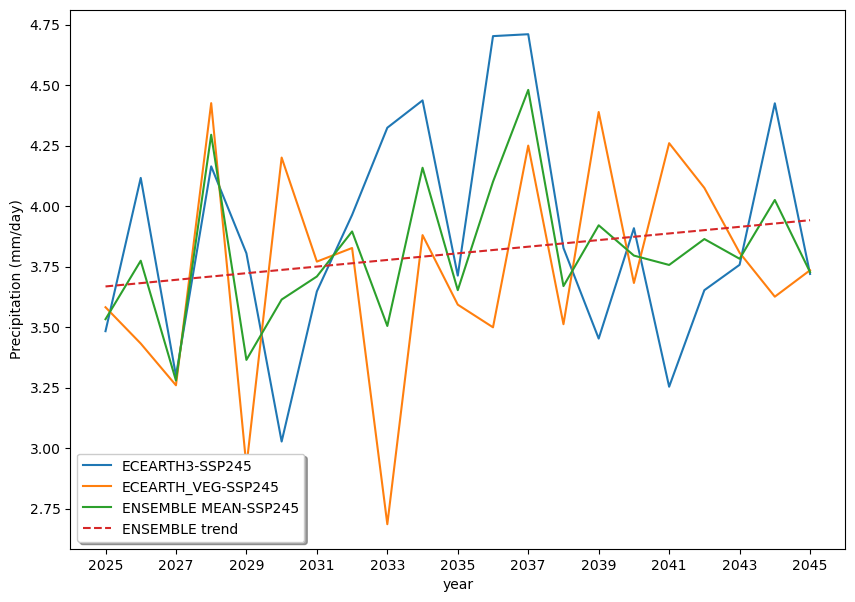

In [26]:
fig,ax = plt.subplots(figsize=(10,7))
ec3_ssp245_pr.pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH3-SSP245')
ecveg_ssp245_pr.pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH_VEG-SSP245')
esm_ssp245_pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ENSEMBLE MEAN-SSP245')
trend_pr = np.polyfit(np.arange(1,22), esm_ssp245_pr.groupby('time.year').mean(['time','lon','lat']), 1)
print(trend_pr)
theta1_pr=trend_pr[1]
theta0_pr=trend_pr[0]
# X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# print(X)
# ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# trend = esm_hist.polyfit('time',1)
# print(trend)
y_pr= np.arange(1,22)*theta0_pr + theta1_pr

print(y_pr)
# print(trend)
ax.plot(np.arange(2025, 2046, step=1), y_pr, linestyle='dashed', label='ENSEMBLE trend')
ax.legend(loc='lower left',
          fancybox=True, shadow=True)
plt.xticks(np.arange(2025, 2046, step=2))
plt.ylabel('Precipitation (mm/day)')
plt.show()
# plt.savefig(os.path.join(imddir, 'Historic_temp.png'))

[0.00525155 3.76321561]
[3.76846715 3.7737187  3.77897025 3.7842218  3.78947335 3.7947249
 3.79997645 3.805228   3.81047955 3.8157311  3.82098265 3.8262342
 3.83148575 3.8367373  3.84198885 3.8472404  3.85249195 3.8577435
 3.86299504 3.86824659 3.87349814]


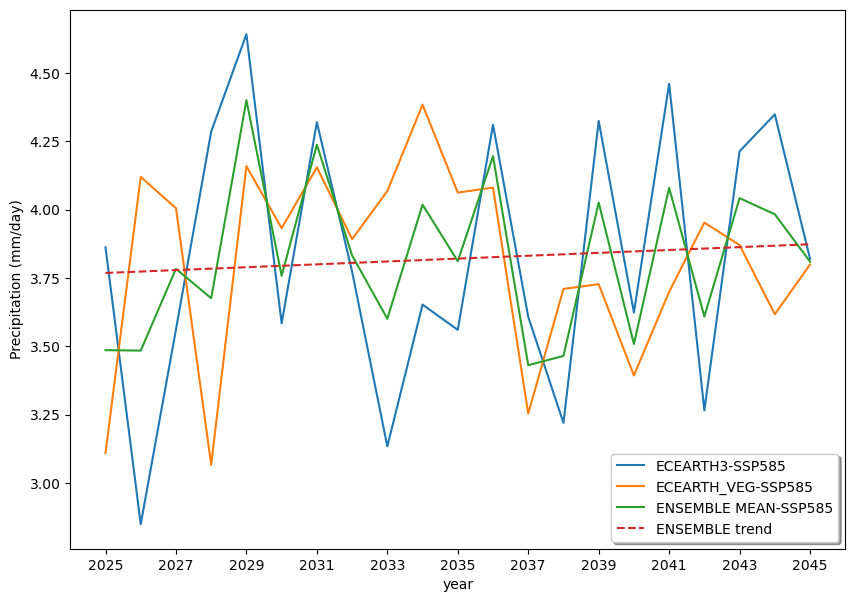

In [27]:
fig,ax = plt.subplots(figsize=(10,7))
ec3_ssp585_pr.pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH3-SSP585')
ecveg_ssp585_pr.pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ECEARTH_VEG-SSP585')
esm_ssp585_pr.groupby('time.year').mean(['time','lon','lat']).plot(ax=ax,label='ENSEMBLE MEAN-SSP585')
trend_pr = np.polyfit(np.arange(1,22), esm_ssp585_pr.groupby('time.year').mean(['time','lon','lat']), 1)
print(trend_pr)
theta1_pr=trend_pr[1]
theta0_pr=trend_pr[0]
# X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# print(X)
# ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# trend = esm_hist.polyfit('time',1)
# print(trend)
y_pr= np.arange(1,22)*theta0_pr + theta1_pr

print(y_pr)
# print(trend)
ax.plot(np.arange(2025, 2046, step=1), y_pr, linestyle='dashed', label='ENSEMBLE trend')
ax.legend(loc='lower right',
          fancybox=True, shadow=True)
plt.xticks(np.arange(2025, 2046, step=2))
plt.ylabel('Precipitation (mm/day)')
plt.show()

In [28]:
Arc_yearly_pr = esm_ssp245_pr.groupby('time.year').mean(['time','lon','lat'])

In [29]:
Arc_yearly_pr

<xarray.DataArray 'pr' (year: 21)>
array([3.532888 , 3.7746072, 3.279453 , 4.295195 , 3.364779 , 3.6141226,
       3.7094107, 3.8955395, 3.5049248, 4.1588235, 3.6529856, 4.1011176,
       4.480584 , 3.669727 , 3.921062 , 3.795819 , 3.757137 , 3.8642066,
       3.7827098, 4.025605 , 3.72758  ], dtype=float32)
Coordinates:
  * year     (year) int64 2025 2026 2027 2028 2029 ... 2041 2042 2043 2044 2045

In [30]:
Arc_clim_pr = esm_hist_pr.mean()

In [31]:
Arc_clim_pr

<xarray.DataArray 'pr' ()>
array(3.8273954, dtype=float32)

In [32]:
Arc_anom_pr = Arc_yearly_pr - Arc_clim_pr

In [33]:
df_pr = Arc_anom_pr.to_dataframe()
df_pr['positive'] = df_pr['pr'] > 0
df_pr.head() # show only first five rows

,pr,positive
year,,
2025,-0.294508,False
2026,-0.052788,False
2027,-0.547942,False
2028,0.467800,True
2029,-0.462616,False


[ 0.0136889  -0.17281722]
[-0.15912832 -0.14543942 -0.13175053 -0.11806163 -0.10437274 -0.09068384
 -0.07699495 -0.06330605 -0.04961716 -0.03592826 -0.02223937 -0.00855047
  0.00513842  0.01882732  0.03251621  0.04620511  0.059894    0.0735829
  0.0872718   0.10096069  0.11464959]


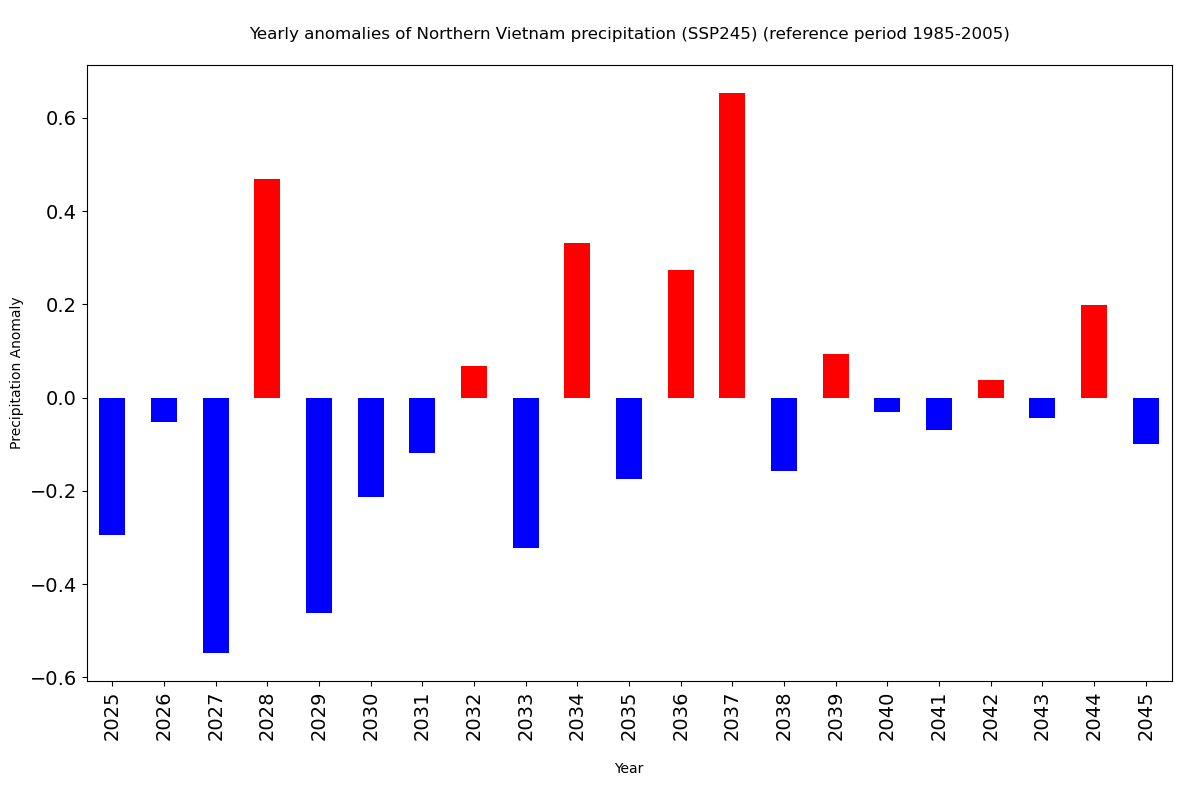

In [34]:
# # fig,ax = plt.subplots(figsize=(14,8))
# plt.rcParams.update({'font.size': 18}) # must set in top
# fig, ax1 = plt.subplots(figsize=(14,8))
# # plt.figure()
# plt.rcParams.update({'font.size': 18}) # must set in top
df_pr['pr'].plot(
    figsize=(14,8),
    kind='bar',
    color=df_pr.positive.map({True: 'red', False: 'blue'}),
    fontsize=14,
    xlabel='\nYear',
    ylabel='Precipitation Anomaly',
    title='\nYearly anomalies of '+grph_name+' Vietnam precipitation (SSP245) (reference period 1985-2005)\n',
    )
trend_pr = np.polyfit(np.arange(1,22), df_pr.pr, 1)
print(trend_pr)
theta1_pr=trend_pr[1]
theta0_pr=trend_pr[0]
# # X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# # print(X)
# # ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# # trend = esm_hist.polyfit('time',1)
# # print(trend)
y_pr= np.arange(1,22)*theta0_pr + theta1_pr
print(y_pr)
# axes2 = ax1.twinx()
# axes2.set_ylim(0, 2)
# axes2.plot(np.arange(2025, 2046, step=1), y, linestyle='dashed', color='k', label='ENSEMBLE trend')
# ax.legend(loc='upper left', 
#           fancybox=True, shadow=True)
# plt.show()

In [35]:
Arc_yearly2_pr = esm_ssp585_pr.groupby('time.year').mean(['time','lon','lat'])

In [36]:
Arc_yearly2_pr

<xarray.DataArray 'pr' (year: 21)>
array([3.4859211, 3.4843276, 3.78355  , 3.6760561, 4.4007397, 3.7580276,
       4.237625 , 3.832815 , 3.6009176, 4.018532 , 3.81146  , 4.195968 ,
       3.430911 , 3.4648907, 4.026102 , 3.5085602, 4.0802407, 3.6090152,
       4.0421505, 3.9831474, 3.809678 ], dtype=float32)
Coordinates:
  * year     (year) int64 2025 2026 2027 2028 2029 ... 2041 2042 2043 2044 2045

In [37]:
Arc_clim2_pr = esm_hist_pr.mean()

In [38]:
Arc_clim2_pr

<xarray.DataArray 'pr' ()>
array(3.8273954, dtype=float32)

In [39]:
Arc_anom2_pr = Arc_yearly2_pr - Arc_clim2_pr

In [40]:
df2_pr = Arc_anom2_pr.to_dataframe()
df2_pr['positive'] = df2_pr['pr'] > 0
# print(df2)
df2_pr.head() # show only first five rows

,pr,positive
year,,
2025,-0.341474,False
2026,-0.343068,False
2027,-0.043845,False
2028,-0.151339,False
2029,0.573344,True


[ 0.00525155 -0.06417983]
[-0.05892828 -0.05367673 -0.04842519 -0.04317364 -0.03792209 -0.03267054
 -0.02741899 -0.02216744 -0.01691589 -0.01166434 -0.00641279 -0.00116124
  0.00409031  0.00934186  0.01459341  0.01984496  0.02509651  0.03034806
  0.03559961  0.04085115  0.0461027 ]


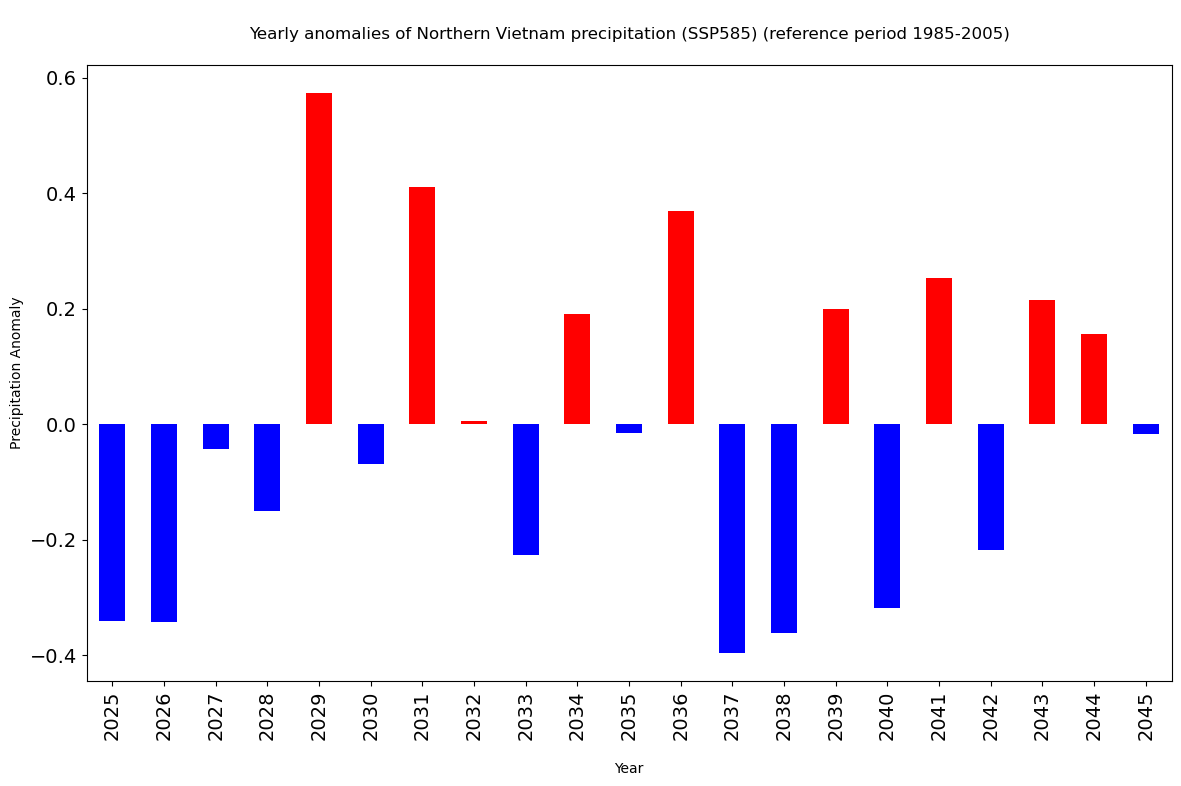

In [41]:
# plt.rcParams.update({'font.size': 18}) # must set in top
df2_pr['pr'].plot(
    figsize=(14,8),
    kind='bar',
    color=df2_pr.positive.map({True: 'red', False: 'blue'}),
    fontsize=14,
    xlabel='\nYear',
    ylabel='Precipitation Anomaly',
    title='\nYearly anomalies of '+grph_name+' Vietnam precipitation (SSP585) (reference period 1985-2005)\n',
    )
trend2_pr = np.polyfit(np.arange(1,22), df2_pr.pr, 1)
print(trend2_pr)
theta12_pr=trend2_pr[1]
theta02_pr=trend2_pr[0]
# # X=esm_hist.groupby('time.year').mean(['time','lon','lat'])
# # print(X)
# # ax.plot([1985, 2005], trend, label='ENSEMBLE Trend')
# # trend = esm_hist.polyfit('time',1)
# # print(trend)
y2_pr= np.arange(1,22)*theta02_pr + theta12_pr
print(y2_pr)